<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.5.1+cu121'

In [5]:
#known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10],X.device

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 device(type='cpu'))

In [ ]:
len(X),len(y)

(50, 50)

##Splitting the data into training and test sets

training set is 80% of the total data

testing set is rest 20%

**Phases**:   training set -> Validation test ->testing set

validation test is not always done but train/test is always done

In [6]:
#create a train/test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

By default, if you don't call plt.figure(), Matplotlib will create a figure automatically when you start plotting.
However, explicitly using plt.figure() gives you more control over the figure's properties, like its size, resolution, and other settings.
You can create multiple figures and switch between them using plt.figure(figure_number), where figure_number is an integer.
In summary: plt.figure() is used to create and manage figures in Matplotlib, which serve as containers for your plots. It helps you organize and customize your visualizations.

In [7]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):

    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")

    if predictions is not None:
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 8})

    plt.show()



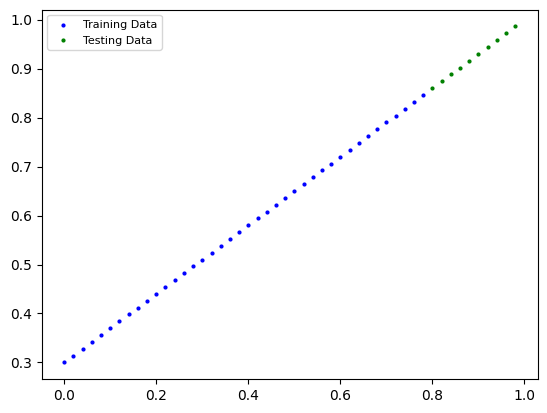

In [ ]:
plot_predictions() #Here blue dots are the training sets and green is test sets

**2.BUILDING A MODEL**

our first Pytorch Model

Syntax for defining return type

def function_name(parameters:parameter_type) -> return_type:
   
    return value

In [10]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    #Initialize Model parameters
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #randn means random variables with normal distributiong form ie mean 0 and standard deviation 1
    #requires_grad is already initialized as True int nn.Parameters function
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    #forward() defines the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias
#

requires_grad=True is necessary for parameters that need to be updated during training.
It allows PyTorch to compute gradients automatically via backpropagation.
For machine learning models, this is crucial

**Pytorch model essentials**

* torch.nn- Contains all of the buildings for computational graphs
* torch.nn.Parameters-what parameters should our model try and learn
* torch.nn.Module-The base class for all neural network modules, if you subclass it you should overrise forward()
* torch.optim-this is where the optimizers live,they will help in gradient descent
* def forward() -All nn.Module subclass require you to use forward(), this is used to define what the module has to do

In [11]:
#create a tp model
torch.manual_seed(42)
model_0=LinearRegressionModel()
model_0

LinearRegressionModel()

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**MAKING PREDICTIONS USING torch.inference_mode()**

we check our models predictive power using inference_mode,we will do it by finding y_preds which will be the predicted y values of our model

InferenceMode is a context manager analogous to no_grad to be used when you are certain your operations will have no interactions with autograd (e.g., model training). Code run under this mode gets better performance by disabling view tracking and version counter bumps. Note that unlike some other mechanisms that locally enable or disable grad, entering inference_mode also disables to forward-mode AD.
It switches off the gradient descent ie it doesnt keep a track of previously used gradients...this reduces the compile time

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)

#torch.no_grad() also does the same job but nowadays inference mode is used more

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

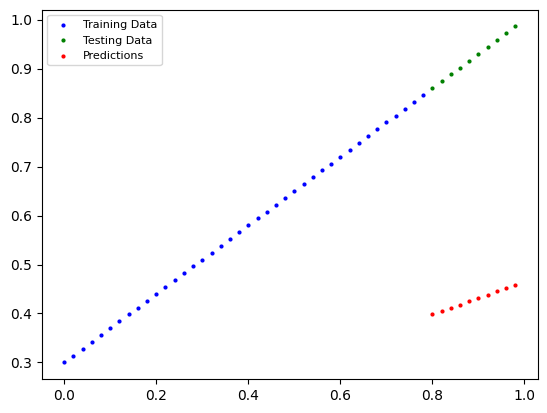

In [ ]:
plot_predictions(predictions=y_preds) #we can see that our model is giving vvvvv varying values that our input/trained model

**TRAINING OUR MODEL**

in training we basically we train our model to move from some "Unknown parameters" to "known parameters"

We do this with the help of Loss Functions

**Loss Functions** tell how bad ur models predictions are, lower the better


**Optimizer** takes into account the loss of a model and adjusts the models parameters(weight,bias)

For Pytorch we need,


*   Training loop
*   Testing loop

There r many loss functions



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We now have to set up an optimizer

lr defines how big/small the optimizer changes the parameters with each step(small lr results in small changes,a large lr results in large changes)

In [12]:
loss_fn=nn.L1Loss()
 #There r many optimizers, we will used SGD model

 # This is the syntax of Optime -> torch.optim.SGD(model_0.parameters(),lr=0.01)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)
#The learning rate is a hyperparameter that determines the size of the steps taken during optimization.
#suppose the learning rate is 0.0001 it will effect the tensor value which was 0.3367 in such a way that only 7 in 0.3367 is effected



Which loss function and optimizer to use, it comes with experience


**BUILDING A TRAINING LOOP**

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(ie resets to first step)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**Gradient descent**)

**EXPLANATIONS**

Why:
torch.manual_seed() ensures that the random number generation is consistent across runs. This is essential when working with stochastic processes like weight initialization or data shuffling, as it helps in debugging and comparing results.


Syntax:


torch.manual_seed(seed_value)
Sets the seed for generating random numbers

**2. Define the number of epochs**
python
Copy code
epochs = 1

Why:
Epochs refer to the number of times the model will loop over the entire training dataset. Training often requires multiple epochs to allow the model to learn effectively. Here, only 1 epoch is used for simplicity.

Syntax:

epochs is just a variable that defines the number of complete passes over the dataset

**3. Loop through the data**
python
Copy code
for epoch in range(epochs):

Why:
This loop allows the training process to repeat for the specified number of epochs. Each iteration corresponds to one complete pass through the training data.

Syntax:
range(epochs) generates numbers from 0 to epochs - 1.

**4. Set the model to training mode**
python
Copy code
model_0.train()

Why:
In PyTorch, models have two modes:
Training mode (model.train()): Enables layers like dropout or batch normalization, which behave differently during training.
Evaluation mode (model.eval()): Turns off behaviors like dropout or batch normalization to ensure consistent results.
Here, model_0.train() ensures that the model is ready for training.

Syntax:
model.train()
Sets the model in training mode.

**5. Perform a forward pass**
python
Copy code
y_pred = model_0(X_train)

Why:
A forward pass computes the model’s predictions for the input data (X_train). This is the step where the model uses its current weights and biases to produce an output.

Syntax:
y_pred = model(input_data)
The model processes the input data and returns predictions.

**6. Calculate the loss**
python
Copy code
loss = loss_fn(y_pred, y_train)

Why:
The loss function measures how far the model’s predictions (y_pred) are from the true values (y_train). This loss will guide the model in updating its parameters.

Syntax:

loss = loss_fn(predictions, targets)
Computes the loss between predictions and ground truth. Common loss functions

include:

nn.CrossEntropyLoss()
nn.MSELoss()

**7. Zero out the gradients**
python
Copy code
optimizer.zero_grad()

Why:
PyTorch accumulates gradients by default, so if you don’t zero out the gradients, they’ll add up across multiple backward passes. This step ensures that gradients are reset for the current training step.

Syntax:

optimizer.zero_grad()
Clears old gradients.

**8. Backpropagate the loss**
python
Copy code
loss.backward()

Why:
Backpropagation computes the gradient of the loss with respect to each parameter of the model using the chain rule. These gradients will later be used by the optimizer to update the model’s parameters.

Syntax:

loss.backward()
Calculates the gradients for all model parameters.

**9. Update the parameters**
python
Copy code
optimizer.step()

Why:
The optimizer updates the model’s parameters using the computed gradients to reduce the loss. This is the step where learning occurs (gradient descent).

Syntax:
optimizer.step()
Updates the parameters

**10. Set the model to evaluation mode**
python
Copy code
model_0.eval()

Why:
After training, switching to evaluation mode ensures consistent behavior during testing or validation by disabling layers like dropout or batch normalization.

Syntax:

model.eval()
Sets the model to evaluation mode.

In [ ]:
torch.manual_seed(42)
#An epoch is one loop through the data
epochs=100

# 0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients

  #1.Forward pass

  y_pred=model_0(X_train)

  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train) #(prediction,true_values)
  print(f"Loss: {loss}")

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  #4.Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5.Step the optimizer (perform gradient descent)
  optimizer.step()


  # Testing
  model_0.eval() # turns off gradient tracking
  print(model_0.state_dict())

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Loss: 0.19767

**YOU CAN SEE THAT THE VALUES ARE GOING CLOSER TO KNOWN VALUES**

weight=0.7

bias=0.3

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

**YOU CAN SEE THAT THE PREDICTS R COMING TOWARDS THE KNOWN PARAMETERS**

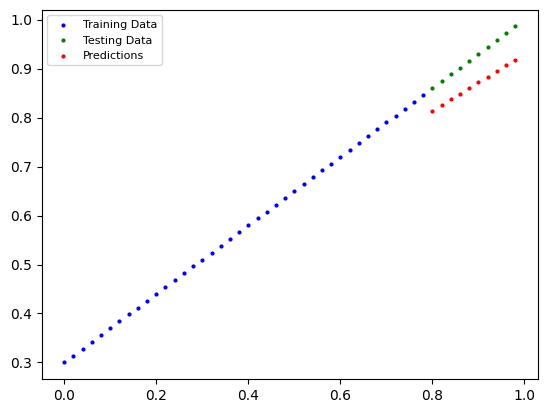

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

plot_predictions(predictions=y_preds_new)

**TESTING MODEL LOOP**

(if you want to restart or back to the original values u have to re run the code where our model was created...ie model_0=LinearRegressionModel())


In [ ]:
torch.manual_seed(42)
#An epoch is one loop through the data
epochs=200

epoch_count=[]
loss_values=[]
test_loss_values=[]

# 0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients

  #1.Forward pass

  y_pred=model_0(X_train)

  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train) #(prediction,true_values)

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  #4.Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5.Step the optimizer (perform gradient descent)
  optimizer.step()


  # Testing
  model_0.eval() # turns off gradient tracking

  with torch.inference_mode():
    # 1.Do the forward pass
    test_pred=model_0(X_test)
    # 2.Calculate the loss
    test_loss=loss_fn(test_pred,y_test)

      if epoch % 10 == 0:
        ### These are few methods or general ways that increase the code readability or make it clean while storing values effficiently
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tenso

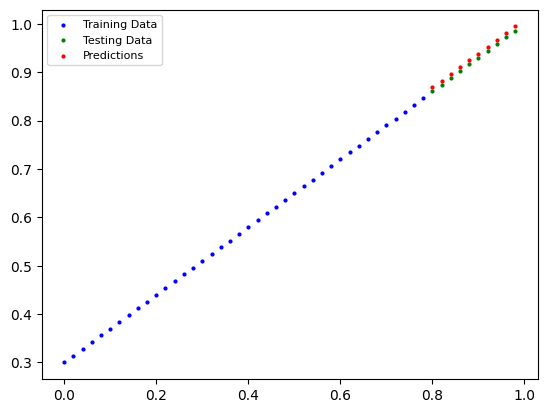

In [ ]:
with torch.inference_mode():
  test_preds=model_0(X_test)

plot_predictions(predictions=test_preds)

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

In [ ]:
test_loss_values

[tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

In [ ]:
epoch_count

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

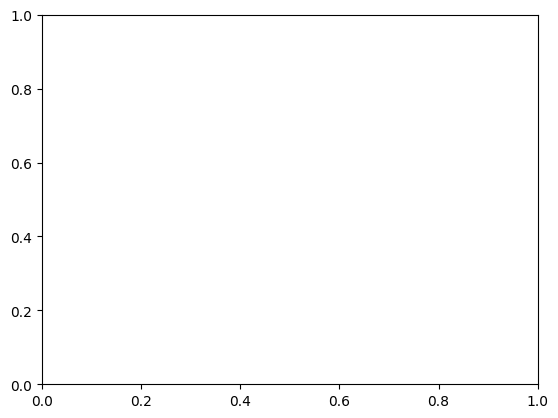

In [ ]:
#plot the curves
plt.plot(epoch_count,loss_values,label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Testing Loss")
plt.xlabel("Epochs")

Here the test_loss_values and loss_values both are tensor datatype, but plt can only plot numpy datatype....thus we convert the tensor to numpy

In [ ]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and Testing Loss")
plt.xlabel("Epochs")
plt.legend()

**SAVING A MODEL IN PYTORCH**
There are 2 main methods you should know about for saving and loading models in Pytorch.



1.   **torch.save()**-allows you save a Pytorch object in pythons pickle format
2.   **torch.load()**-allows you load a saved Pytorch object
3.  **torch.nn.Module.load_state_dict()**-this allows to load a models saved state dictionary



In [ ]:
model_0.state_dict()

In [ ]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"  #pytorch objects have .pth format
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model using state_dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


**LOADING A PYTORCH MODEL**

Since we saved our models state_dict() rather the entire model, we'll create a new instance of our model class and loa d the saved 'state_dict' into that

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance our model class

loaded_model_0=LinearRegressionModel()
loaded_model_0.state_dict()

In [ ]:
# We created a new model...now we have to load our existing models state dict to this new model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [ ]:
# Mke some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred=loaded_model_0(X_test)

loaded_model_pred

#We can see that our both models values r coming same

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

In [ ]:
y_preds == loaded_model_pred